In [1]:
from mnist import load_mnist
from matplotlib import pyplot as plt
from PIL import Image
from matplotlib import cm
import numpy as np

In [2]:
train, validation, test = load_mnist()

Extracting MNIST-data\train-images-idx3-ubyte.gz
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz


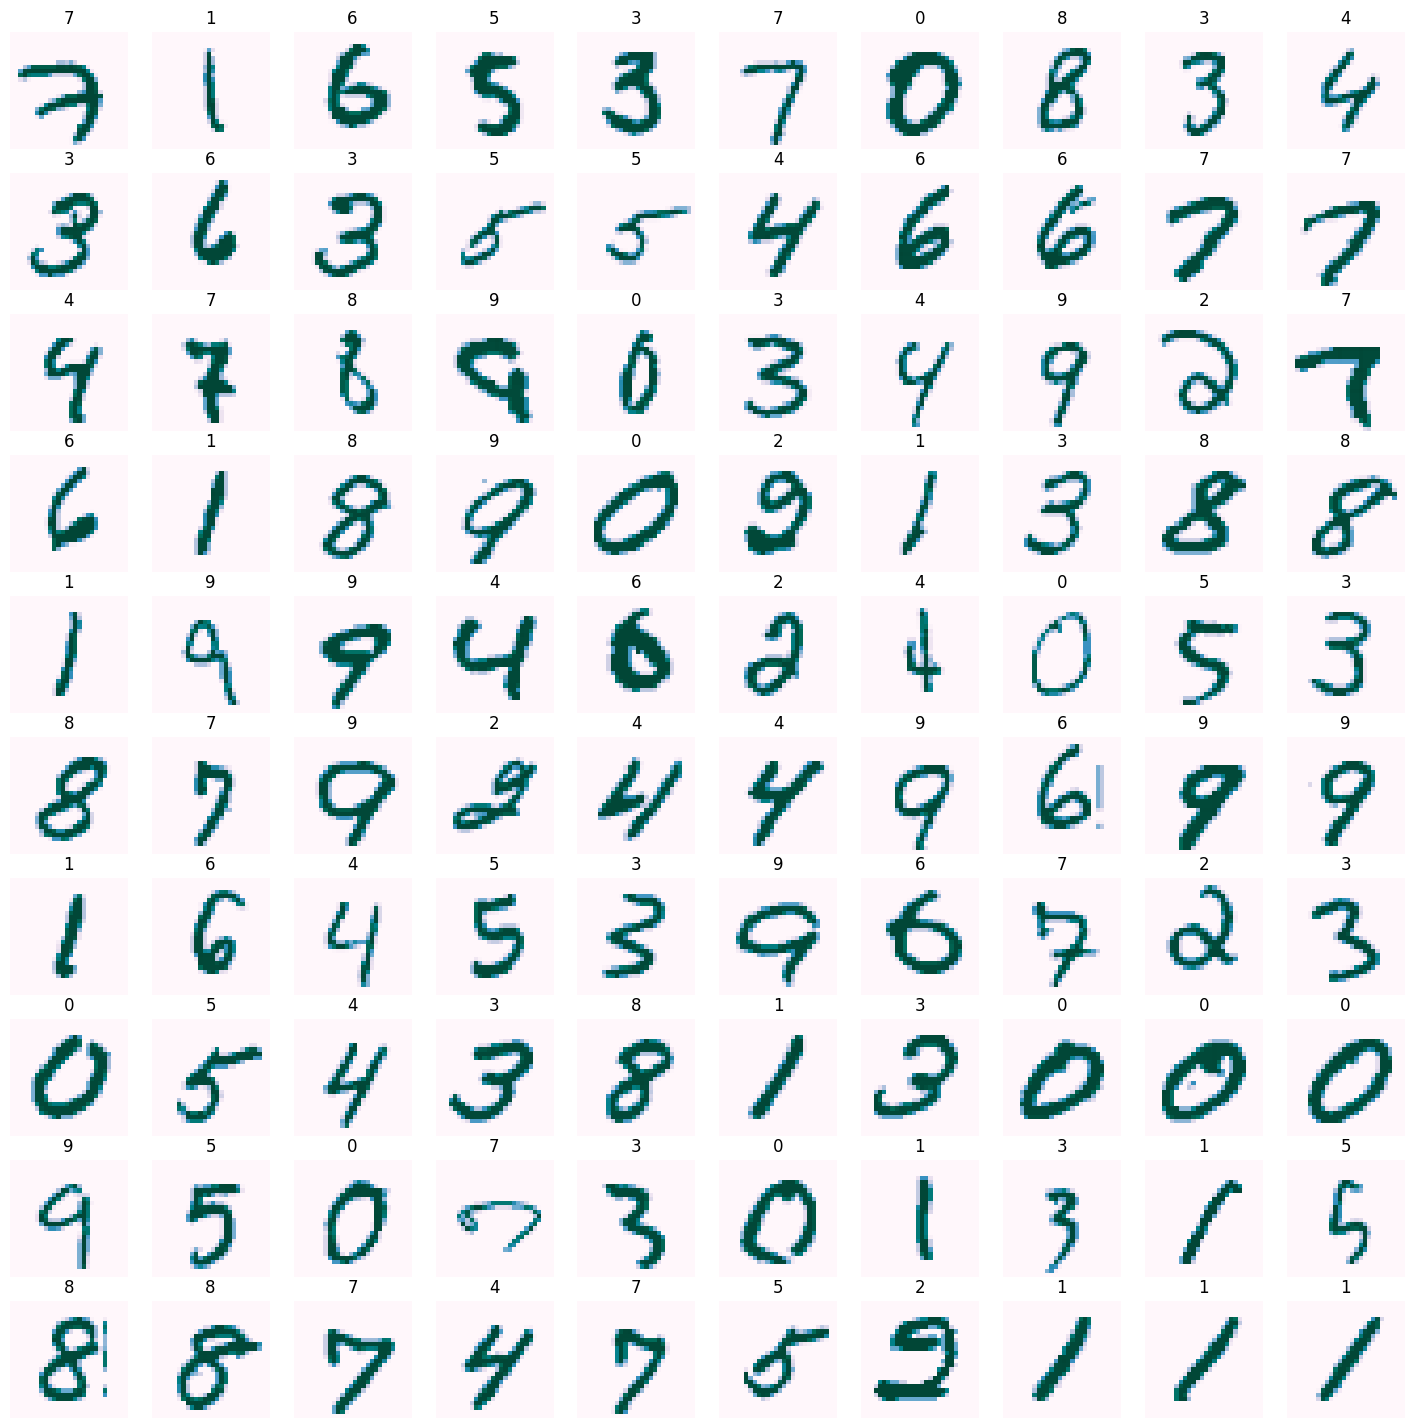

In [10]:
images = train[0]
fig, ax = plt.subplots(10, 10, figsize=(18,18))
for i in range(10):
    for j in range(10):
        ax[i,j].imshow(images[i+20*j], cmap = 'К')
        ax[i,j].set_title(train[1][i+20*j])
        ax[i,j].axis('off')
data = train[0].reshape(55000, 784)
labels = train[1]

In [4]:
class PCA():
#     leave_compomemts - сколько компонент оставляем
    def __init__(self, leave_compomemts=None):
        self.leave_compomemts = leave_compomemts
    
    def fit(self, data):
        data_1 = data.copy()
        m = np.mean(data_1, axis = 0)
        data_1 = data_1.astype('float64') - m
        pl = data_1.T.dot(data_1)
        l, F = np.linalg.eigh(pl)
        l = l[::-1]
        F = F[:, ::-1]
        return data_1, F, l
        
    def transform(self, data, F):
        Y = data.dot(F)
        return Y

    def fit_transform(self, data):
        X_c, F, _ = self.fit(data)
        Y = self.transform(X_c, F)
        if self.leave_compomemts != None:
            Y = Y[:, :(self.leave_compomemts)]
        return Y

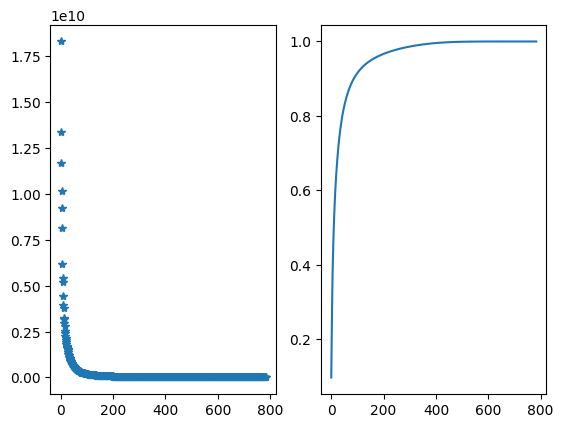

In [5]:
attempt = PCA(2)
_, _, mel = attempt.fit(data)
plt.subplot(1,2,1)
plt.plot(mel, marker = '*', linestyle = '')
plt.subplot(1,2,2)
plt.plot(np.cumsum(mel) / np.sum(mel))

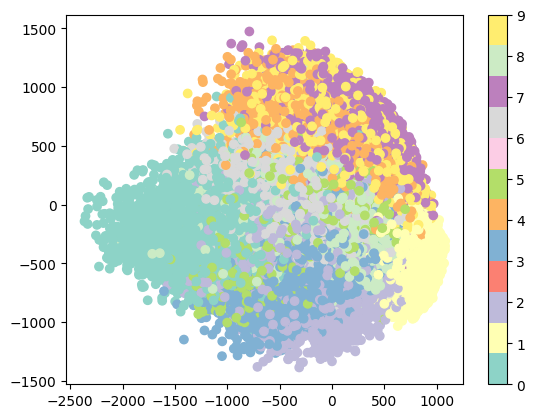

In [6]:
Y_axis = attempt.fit_transform(data)
plt.scatter(Y_axis[:, 0], Y_axis[:, 1], c = labels, cmap = 'Set3')
plt.colorbar()

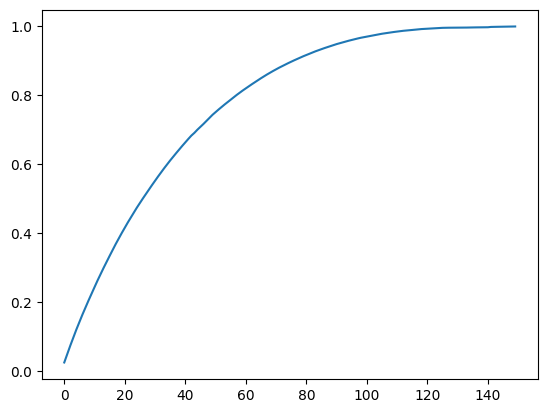

In [7]:
A = np.random.randn(150,150)
l, _ = np.linalg.eig(A.dot(A.T))
plt.plot(np.cumsum(l) / np.sum(l))

### Вывод  
Метод главных компонент (PCA) является полезным инструментом для анализа данных, который может помочь снизить размерность данных и сохранить наибольшую долю их изменчивости. Он может быть использован для визуализации данных, обнаружения шаблонов и структур в данных, а также для поиска скрытых связей между переменными.